In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

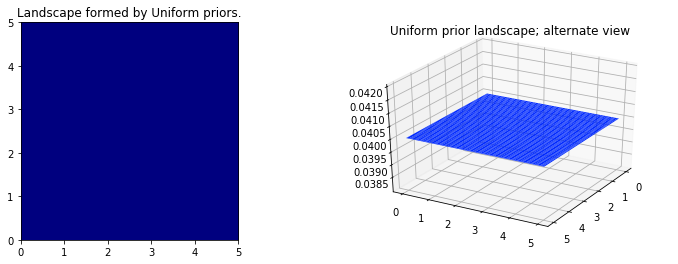

In [3]:
jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, vmax=1, vmin=0.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-0.15)
ax.view_init(azim=390)
plt.title("Uniform prior landscape; alternate view")

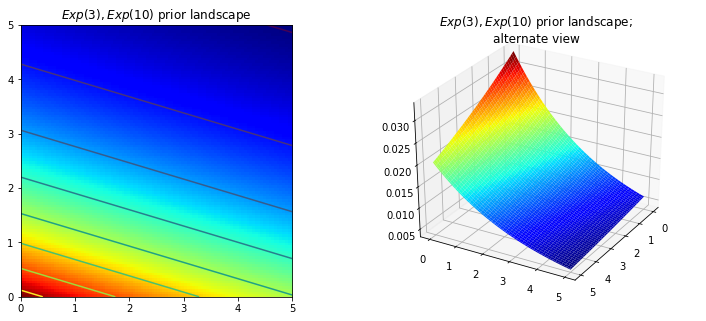

In [12]:
figsize(12.5, 5)
fig = plt.figure()
'''
    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*.
'''
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

''''
contour(X,Y,Z)
    *X*, *Y* specify the (x, y) coordinates of the surface
'''
CS = plt.contour(X, Y, M)

im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
plt.title("$Exp(3), Exp(10)$ prior landscape")

ax = fig.add_subplot(122, projection='3d')

'''
plot_surface(X, Y, Z, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color,
    but it also supports color mapping by supplying the *cmap*
    argument.
*cmap*        A colormap for the surface patches.
'''
ax.plot_surface(X, Y, M, cmap=jet)

'''
view_init(elev=None, azim=None) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Set the elevation and azimuth of the axes.
    
    This can be used to rotate the axes programatically.
'''
ax.view_init(azim=390)
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view")

In [43]:
# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 1

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

#...we see the data generated, dependent on the above two values.
help(stats.poisson.rvs)
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)

print("-"*100)
print("observed (2-dimensional,sample size = %d):" % N, data)
print("-"*100)

# plotting details.
help(stats.poisson.pmf)
x = y = np.linspace(0.01, 5, 100) # x: lambda_1, y: lambda_2
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwargs) method of scipy.stats._discrete_distns.poisson_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    size : int or tuple of ints, optional
        Defining number of random variates (Default is 1).  Note that `size`
        has to be given as keyword, not as positional argument.
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.

-------------------------------------------------

(0, 5)

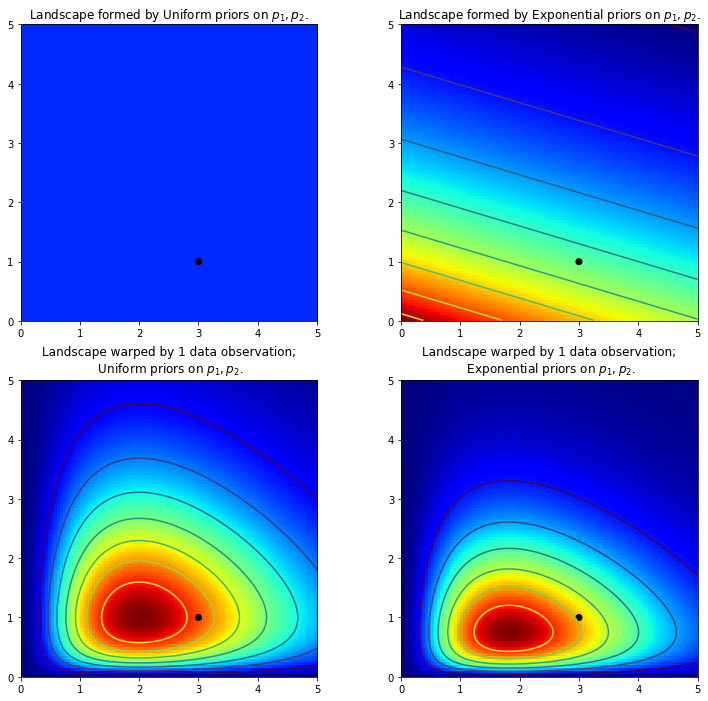

In [44]:
figsize(12.5, 12)
# matplotlib heavy lifting below, beware!
plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None,:])

im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, vmax=1, vmin=-0.15, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors on $p_1, p_2$.")

plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N)
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(x, loc=0, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Exponential priors on $p_1, p_2$.")

plt.subplot(224)
# This is the likelihood times prior, that results in the posterior.
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.title("Landscape warped by %d data observation;\n Exponential priors on \
$p_1, p_2$." % N)
plt.xlim(0, 5)
plt.ylim(0, 5)

In [45]:
def plot_posterior_distribution():
    figsize(12.5, 12)
    # matplotlib heavy lifting below, beware!
    plt.subplot(221)
    uni_x = stats.uniform.pdf(x, loc=0, scale=5)
    uni_y = stats.uniform.pdf(x, loc=0, scale=5)
    M = np.dot(uni_x[:, None], uni_y[None,:])
    
    im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, vmax=1, vmin=-0.15, extent=(0, 5, 0, 5))
    
    plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title("Landscape formed by Uniform priors on $p_1, p_2$.")
    
    plt.subplot(223)
    plt.contour(x, y, M * L)
    im = plt.imshow(M * L, interpolation='none', origin='lower',
                    cmap=jet, extent=(0, 5, 0, 5))
    plt.title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N)
    plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    
    plt.subplot(222)
    exp_x = stats.expon.pdf(x, loc=0, scale=3)
    exp_y = stats.expon.pdf(x, loc=0, scale=10)
    M = np.dot(exp_x[:, None], exp_y[None, :])
    
    plt.contour(x, y, M)
    im = plt.imshow(M, interpolation='none', origin='lower',
                    cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title("Landscape formed by Exponential priors on $p_1, p_2$.")
    
    plt.subplot(224)
    # This is the likelihood times prior, that results in the posterior.
    plt.contour(x, y, M * L)
    im = plt.imshow(M * L, interpolation='none', origin='lower',
                    cmap=jet, extent=(0, 5, 0, 5))
    
    plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
    plt.title("Landscape warped by %d data observation;\n Exponential priors on \
    $p_1, p_2$." % N)
    plt.xlim(0, 5)
    plt.ylim(0, 5)

observed (2-dimensional,sample size = 2): [[0 3]
 [1 1]]


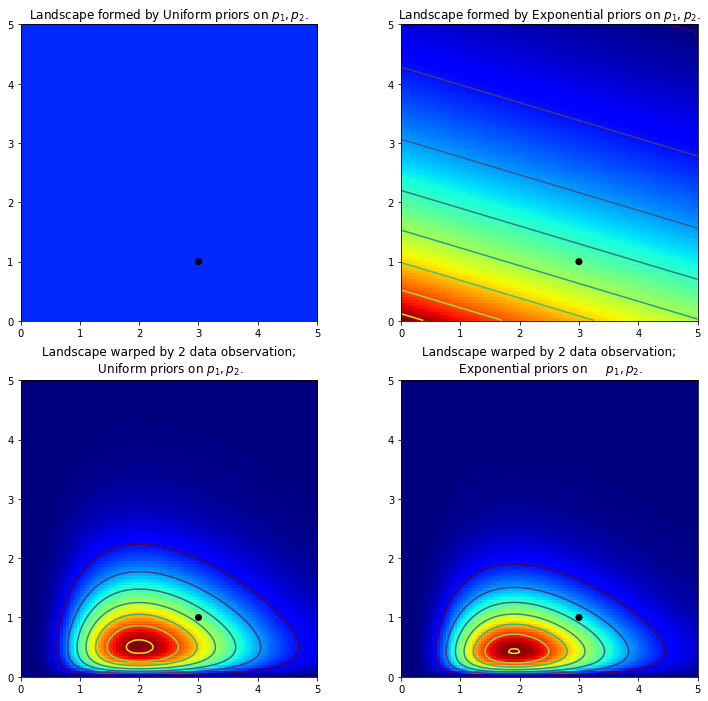

In [46]:
# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 2

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

#...we see the data generated, dependent on the above two values.
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)

print("observed (2-dimensional,sample size = %d):" % N, data)

# plotting details.
x = y = np.linspace(0.01, 5, 100) # x: lambda_1, y: lambda_2
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

plot_posterior_distribution()

observed (2-dimensional,sample size = 5): [[0 1]
 [0 2]
 [1 3]
 [2 6]
 [0 2]]


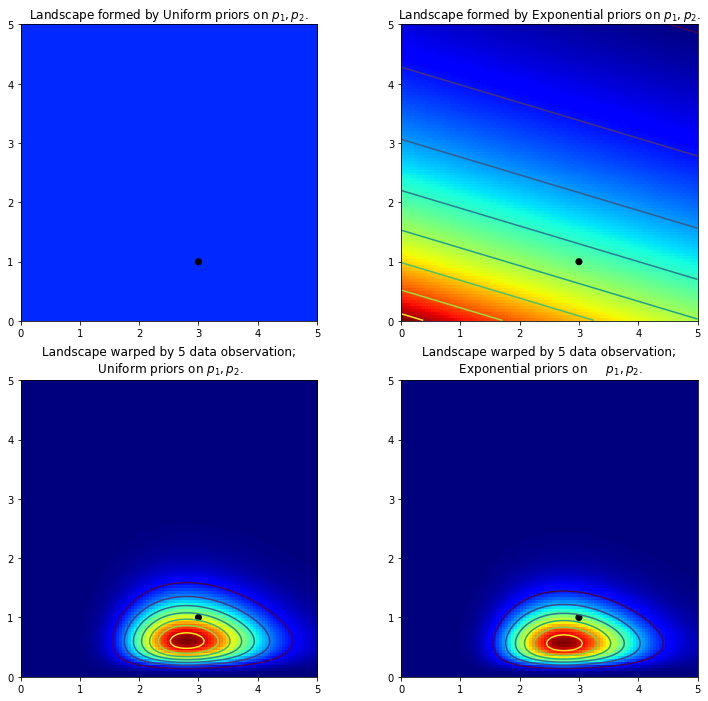

In [38]:
# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 5

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

#...we see the data generated, dependent on the above two values.
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)

print("observed (2-dimensional,sample size = %d):" % N, data)

# plotting details.
x = y = np.linspace(0.01, 5, 100) # x: lambda_1, y: lambda_2
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

plot_posterior_distribution()

observed (2-dimensional,sample size = 10): [[2 2]
 [1 4]
 [2 1]
 [1 2]
 [0 6]
 [2 4]
 [0 4]
 [4 3]
 [2 0]
 [2 4]]


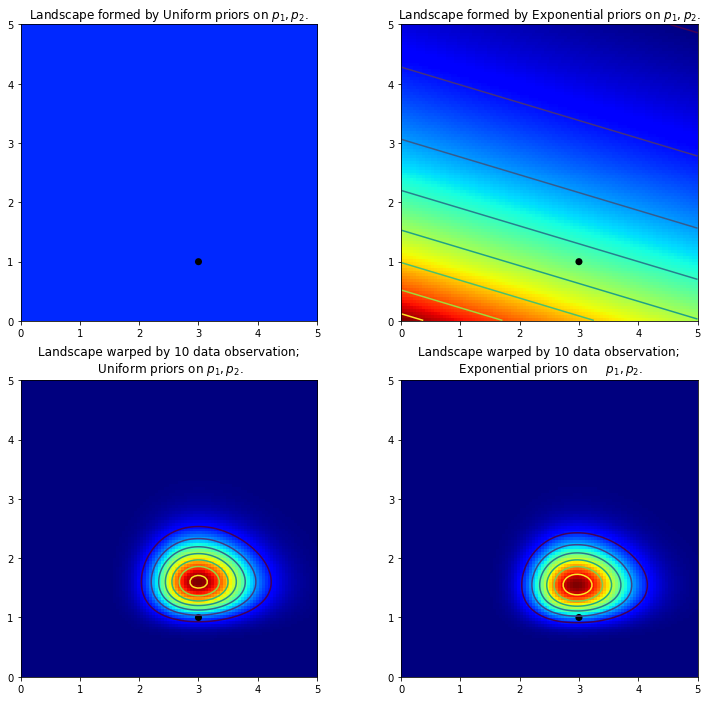

In [39]:
# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 10

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

#...we see the data generated, dependent on the above two values.
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)

print("observed (2-dimensional,sample size = %d):" % N, data)

# plotting details.
x = y = np.linspace(0.01, 5, 100) # x: lambda_1, y: lambda_2
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

plot_posterior_distribution()

observed (2-dimensional,sample size = 100):


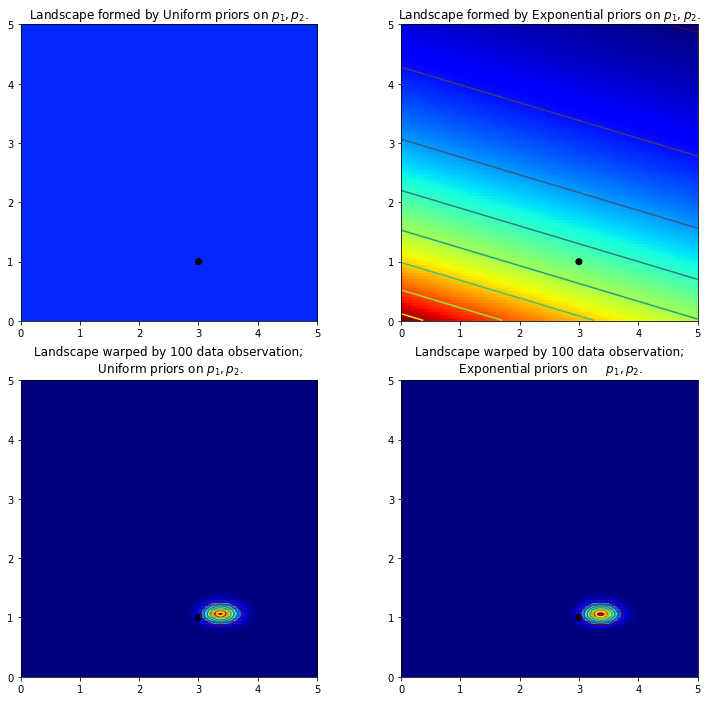

In [41]:
# sample size of data we observe, trying varying this (keep it less than 100 ;)
N = 100

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

#...we see the data generated, dependent on the above two values.
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)

print("observed (2-dimensional,sample size = %d):" % N)

# plotting details.
x = y = np.linspace(0.01, 5, 100) # x: lambda_1, y: lambda_2
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

plot_posterior_distribution()

In [29]:
'''
numpy.newaxis
The newaxis object can be used in all slicing operations to create an axis of length one. newaxis is an alias for ‘None’, and ‘None’ can be used in place of this with the same result.
https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html#numpy.newaxis
'''

a = np.array([[1,2], [3,4]])
print(a.shape)
print("-"*100)
print(a[None, :])
print(a[None, :] == a[np.newaxis, :])
print(a[None, :].shape)
print("-"*100)
print(a[:, None])
print(a[:, None] == a[:, np.newaxis])
print(a[:, None].shape)

(2, 2)
----------------------------------------------------------------------------------------------------
[[[1 2]
  [3 4]]]
[[[ True  True]
  [ True  True]]]
(1, 2, 2)
----------------------------------------------------------------------------------------------------
[[[1 2]]

 [[3 4]]]
[[[ True  True]]

 [[ True  True]]]
(2, 1, 2)


[ 115.85679142  152.26153716  178.87449059  162.93500815  107.02820697
  105.19141146  118.38288501  125.3769803   102.88054011  206.71326136] ...


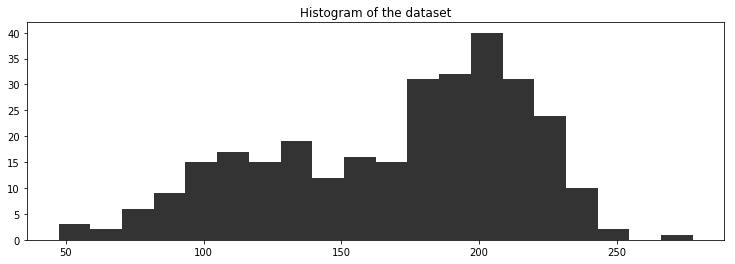

In [48]:
figsize(12.5, 4)
data = np.loadtxt("data/mixture_data.csv", delimiter=",")

plt.hist(data, bins=20, color="k", histtype="stepfilled", alpha=0.8)
plt.title("Histogram of the dataset")
plt.ylim([0, None])
print(data[:10], "...")

In [53]:
import pymc3 as pm
import theano.tensor as T

with pm.Model() as model:
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    p = T.stack([p1, p2])
    assignment = pm.Categorical("assignment", p, shape=data.shape[0], testval=np.random.randint(0, 2, data.shape[0]))
    
print("prior assignment, with p = %.2f:" % p1.tag.test_value)
print(assignment.tag.test_value[:10])

prior assignment, with p = 0.50:
[1 1 0 0 1 0 1 1 0 1]


In [54]:
with model:
    sds = pm.Uniform("sds", 0, 100, shape=2)
    centers = pm.Normal("centers", mu=np.array([120, 190]), sd=np.array([10, 10]), shape=2)
    
    # 2つのクラスタへの割当をcenter_0, center1、 sd_0, sd_1にマップする。
    center_i = pm.Deterministic('center_i', centers[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    
    # and to combine it with the observations:
    observations = pm.Normal("obs", mu=center_i, sd=sd_i, observed=data)

print("Random assignments: ", assignment.tag.test_value[:4], "...")
print("Assigned center: ", center_i.tag.test_value[:4], "...")
print("Assigned standard deviation: ", sd_i.tag.test_value[:4])

Random assignments:  [1 1 0 0] ...
Assigned center:  [ 190.  190.  120.  120.] ...
Assigned standard deviation:  [ 50.  50.  50.  50.]


In [55]:
with model:
    step1 = pm.Metropolis(vars=[p, sds, centers])
    step2 = pm.ElemwiseCategorical(vars=[assignment])
    trace = pm.sample(25000, step=[step1, step2])

/Users/yusuke/anaconda/envs/pymc3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 25500/25500 [02:39<00:00, 159.93it/s]


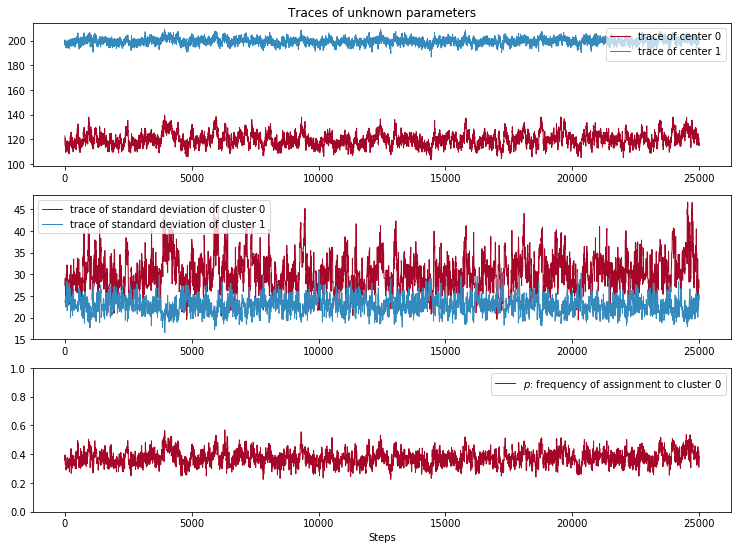

In [56]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = trace["centers"]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]


figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = trace["centers"]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = trace["sds"]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0",
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1",
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = trace["p"]
plt.plot(p_trace, label="$p$: frequency of assignment to cluster 0",
     color=colors[0], lw=lw)
plt.xlabel("Steps")
plt.ylim(0, 1)
plt.legend()

In [57]:
with model:
    trace = pm.sample(50000, step=[step1, step2], trace=trace)

100%|██████████| 50500/50500 [05:14<00:00, 160.76it/s]


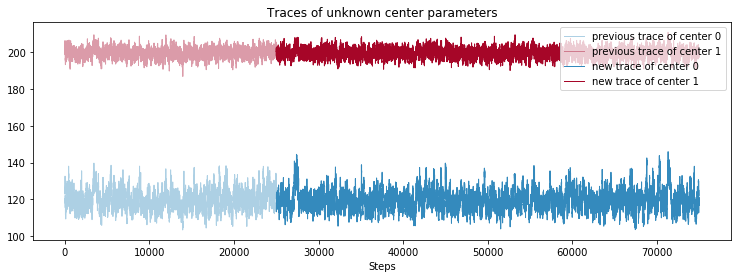

In [59]:
figsize(12.5, 4)
center_trace = trace["centers"][25000:]
prev_center_trace = trace["centers"][:25000]

x = np.arange(25000)
plt.plot(x, prev_center_trace[:, 0], label="previous trace of center 0",
     lw=lw, alpha=0.4, c=colors[1])
plt.plot(x, prev_center_trace[:, 1], label="previous trace of center 1",
     lw=lw, alpha=0.4, c=colors[0])

x = np.arange(25000, 75000)
plt.plot(x, center_trace[:, 0], label="new trace of center 0", lw=lw, c="#348ABD")
plt.plot(x, center_trace[:, 1], label="new trace of center 1", lw=lw, c="#A60628")

plt.title("Traces of unknown center parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.8)
plt.xlabel("Steps");

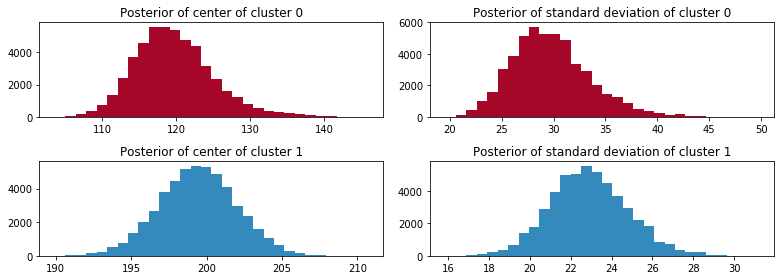

In [60]:
figsize(11.0, 4)
std_trace = trace["sds"][25000:]
prev_std_trace = trace["sds"][:25000]

_i = [1,2,3,4]
for i in range(2):
    plt.subplot(2, 2, _i[2*i])
    plt.title("Posterior of center of cluster %d" % i)
    plt.hist(center_trace[:, i], color=colors[i], bins=30, histtype="stepfilled")
    
    plt.subplot(2, 2, _i[2*i + 1])
    plt.title("Posterior of standard deviation of cluster %d" % i)
    plt.hist(std_trace[:, i], color=colors[i], bins=30, histtype="stepfilled")

plt.tight_layout()

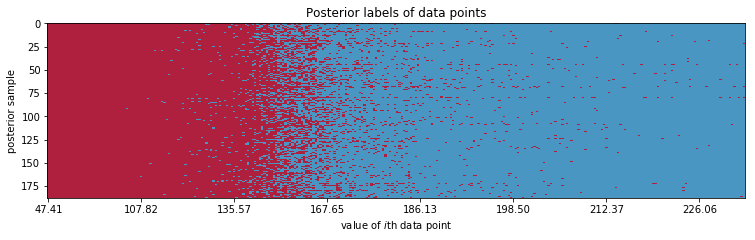

In [61]:
import matplotlib as mpl
figsize(12.5, 4.5)
plt.cmap = mpl.colors.ListedColormap(colors)
plt.imshow(trace["assignment"][::400, np.argsort(data)], cmap=plt.cmap, aspect=0.4, alpha=0.9)
plt.xticks(np.arange(0, data.shape[0], 40), ["%.2f" % s for s in np.sort(data)[::40]])
plt.ylabel("posterior sample")
plt.xlabel("value of $i$th data point")
plt.title("Posterior labels of data points");

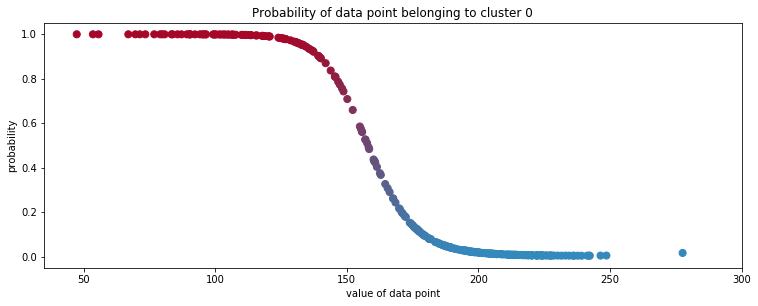

In [62]:
cmap = mpl.colors.LinearSegmentedColormap.from_list("BMH", colors)
assign_trace = trace["assignment"]
plt.scatter(data, 1 - assign_trace.mean(axis=0), cmap=cmap, c=assign_trace.mean(axis=0), s=50)
plt.ylim(-0.05, 1.05)
plt.xlim(35, 300)
plt.title("Probability of data point belonging to cluster 0")
plt.ylabel("probability")
plt.xlabel("value of data point")

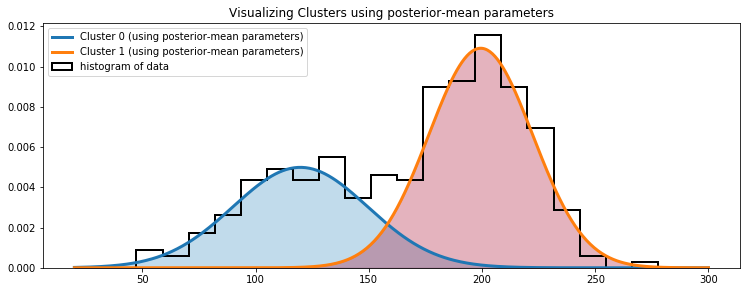

In [63]:
norm = stats.norm
x = np.linspace(20, 300, 500)
posterior_center_means = center_trace.mean(axis=0)
posterior_std_means = std_trace.mean(axis=0)
posterior_p_mean = trace["p"].mean()

plt.hist(data, bins=20, histtype="step", normed=True, color="k", lw=2, label="histogram of data")

y = posterior_p_mean * norm.pdf(x, loc=posterior_center_means[0], scale=posterior_std_means[0])
plt.plot(x, y, label="Cluster 0 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[1], alpha=0.3)

y = (1 - posterior_p_mean)*norm.pdf(x, loc=posterior_center_means[1], scale=posterior_std_means[1])
plt.plot(x, y, label="Cluster 1 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[0], alpha=0.3)

plt.legend(loc="upper left")
plt.title("Visualizing Clusters using posterior-mean parameters")

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
100%|██████████| 10500/10500 [00:01<00:00, 8832.93it/s]


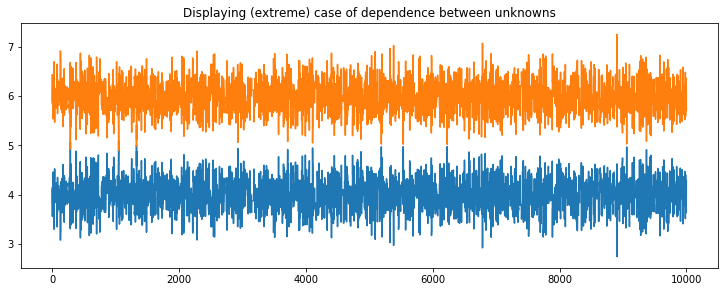

In [64]:
import pymc3 as pm

with pm.Model() as model:
    x = pm.Normal("x", mu=4, tau=10)
    y = pm.Deterministic("y", 10 - x)
    
    trace_2 = pm.sample(10000, pm.Metropolis())

plt.plot(trace_2["x"])
plt.plot(trace_2["y"])
plt.title("Displaying (extreme) case of dependence between unknowns")

In [65]:
norm_pdf = stats.norm.pdf
p_trace = trace["p"][25000:]
# prev_p_trace = trace["p"][:25000]
x = 175

p_l1_given_x = p_trace * norm_pdf(x, loc=center_trace[:, 0], scale=std_trace[:, 0])
p_l0_given_x = (1 - p_trace) * norm_pdf(x, loc=center_trace[:, 1], scale=std_trace[:, 1])

v = p_l1_given_x > p_l0_given_x

print("Probability of belonging to cluster 1:", v.mean())

Probability of belonging to cluster 1: 0.00556


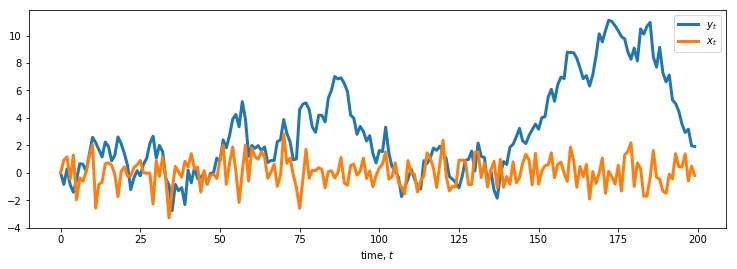

In [66]:
figsize(12.5, 4)

x_t = np.random.normal(0, 1, 200)
x_t[0] = 0
y_t = np.zeros(200)
for i in range(1, 200):
    y_t[i] = np.random.normal(y_t[i - 1], 1)

plt.plot(y_t, label="$y_t$", lw=3)
plt.plot(x_t, label="$x_t$", lw=3)
plt.xlabel("time, $t$")
plt.legend()

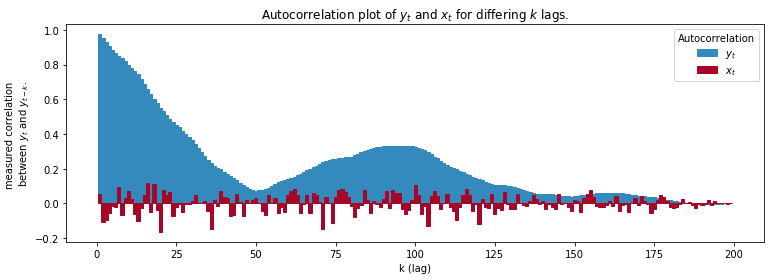

In [68]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    return result[result.size // 2:]

colors = ["#348ABD", "#A60628", "#7A68A6"]

x = np.arange(1, 200)

plt.bar(x, autocorr(y_t)[1:], width=1, label="$y_t$",
        edgecolor=colors[0], color=colors[0])
plt.bar(x, autocorr(x_t)[1:], width=1, label="$x_t$",
        color=colors[1], edgecolor=colors[1])

plt.legend(title="Autocorrelation")
plt.ylabel("measured correlation \nbetween $y_t$ and $y_{t-k}$.")
plt.xlabel("k (lag)")
plt.title("Autocorrelation plot of $y_t$ and $x_t$ for differing $k$ lags.")

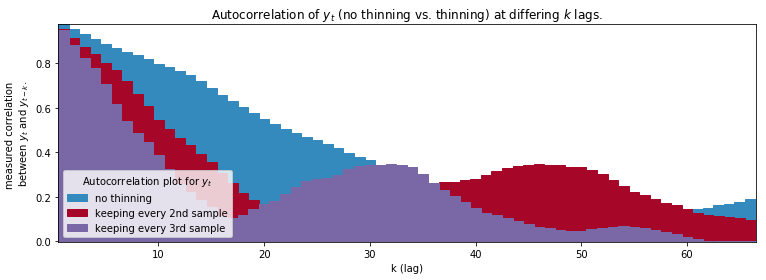

In [69]:
max_x = 200 // 3 + 1
x = np.arange(1, max_x)

plt.bar(x, autocorr(y_t)[1:max_x], edgecolor=colors[0],
        label="no thinning", color=colors[0], width=1)
plt.bar(x, autocorr(y_t[::2])[1:max_x], edgecolor=colors[1],
        label="keeping every 2nd sample", color=colors[1], width=1)
plt.bar(x, autocorr(y_t[::3])[1:max_x], width=1, edgecolor=colors[2],
        label="keeping every 3rd sample", color=colors[2])

plt.autoscale(tight=True)
plt.legend(title="Autocorrelation plot for $y_t$", loc="lower left")
plt.ylabel("measured correlation \nbetween $y_t$ and $y_{t-k}$.")
plt.xlabel("k (lag)")
plt.title("Autocorrelation of $y_t$ (no thinning vs. thinning) \
at differing $k$ lags.")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fecff60>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x11ff3a2b0>]], dtype=object)

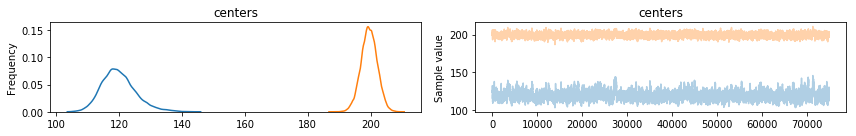

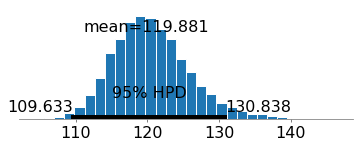

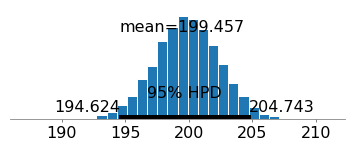

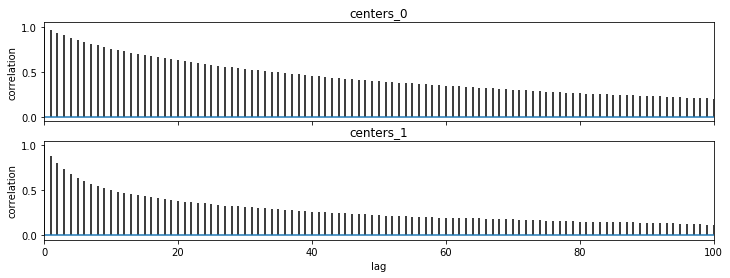

In [70]:
pm.plots.traceplot(trace=trace, varnames=["centers"])
pm.plots.plot_posterior(trace=trace["centers"][:,0])
pm.plots.plot_posterior(trace=trace["centers"][:,1])
pm.plots.autocorrplot(trace=trace, varnames=["centers"])